## Department of Computer Science, University of York
### DATA: Introduction to Data Science

## Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

**Write your answer here (text cell(s) to be used, as appropriate)**

### Write your answer here (code cell(s) to be used, as appropriate)
## Domain Analysis

The business domain problem centers on effectively analyzing and managing National Health Service (NHS) healthcare operations data. These operations and associated data include:

- Appointment Records  
- Billing Records  
- Insurance Records  
- Prescription Records  
- Surgery Records  
- Test Records  

Given the scale of the NHS and the complex, critical nature of the UK healthcare system — combined with poor data integration — there are significant inefficiencies, miscommunications, and resource misallocations. These issues negatively affect both the cost of healthcare and overall patient satisfaction.

In this context, the application of data science is particularly compelling. Data science allows unnormalized and fragmented data to be transformed into structured, analyzable information. By applying techniques such as data normalization, pattern recognition, and statistical analysis, healthcare providers can extract essential insights to streamline workflows and improve service delivery nationwide.

### Main Areas of Interest

The key areas identified for investigation include:

- Understanding relationships between hospitals, services, medical professionals, and patients  
- Identifying patterns in appointments, service usage, and patient preferences  
- Improving the planning and scheduling of healthcare services  

### Potential Solutions

A potential solution to this domain problem involves developing a normalized database of NHS operational data. This would:

- Promote data integrity and consistency  
- Enable advanced analysis such as predictive modeling  
- Support the creation of dashboards for administrative use  
- Optimize scheduling of health services  
- Automate reporting  
- Facilitate real-time querying for evidence-based decision-making across the organization  



----
----


## Task 2: Database Design (30 marks)


(**10 marks**) Design a conceptual database schema for the given NHS context, represented as an entity-relationship (ER) diagram using Chen's notation (as taught in the module). Your ER diagram should capture all the essential entities, attributes, primary keys, relationships, and cardinalities, necessary to model the healthcare operations described in the scenario.   

The healthcare data currently exists in the form of six csv files called  *Appointments\_Data.csv, Prescription\_Billing\_Insurance\_Data.csv, Service\_Billing\_Insurance\_Data.csv, Medical\_Appointments\_Data.csv, Medical\_Surgeries\_Data.csv and Medical\_Tests\_Data.csv*, provided on VLE (*path given in page 6 in the assessment paper*). These files have all the existing records. The tables available in the csv files are unnormalised. The information about the different columns in them is given in Tables 1-6 (in the paper), respectively.

(**10 marks**) Normalise the provided tables to the Third Normal Form (3NF), minimising data redundancy and ensuring data integrity. Demonstrate the steps involved in achieving 3NF, showing how you decomposed the tables through 1NF and 2NF. 

(**10 marks**) Finally, implement your 3NF schema in an SQLite database using SQL.
Your answer should include the SQL statements needed to accomplish this step and populate the final tables with the appropriate data. 

Your submission should include the final SQLite database file. 

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated primary and foreign keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.
 
**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

### Write your answer here (code cell(s) to be used, as appropriate)
## ER Diagram
<img src="diagrams.png" width="1000" height="300">


##  Database Normalization

### Table 1: Appointment Data 


| Appointment_ID | Patient_ID(FK) | Appointment_Date | Appointment_Time | Patient_Name | Patient_Date_Of_Birth | Patient_Gender | Patient_Address | Patient_Preferred_Hospital_ID(FK) | Patient_Preferred_Pharmacy_ID(FK) | Patient_Preferred_Insurance_Provider(FK) | Emergency_Contact_Relationship | Emergency_Contact_Name | Emergency_Contact_Phone | Emergency_Contact_Address(FK) | Professional_Name(FK) | Professional_Role(FK) | Department_ID(FK) | Department_Name | Head_of_Department | Hospital_ID(FK) | Hospital_Name | Hospital_Location | Hospital_Contact |
|----------------|------------|------------------|------------------|--------------|------------------------|----------------|------------------|-------------------------------|-------------------------------|---------------------------------------|-------------------------------|------------------------|------------------------|--------------------------|-------------------|------------------|----------------|------------------|---------------------|-------------|----------------|--------------------|------------------|

###  1NF: First Normal Form

**Functional Dependencies:**

- **FD1:** `Patient_ID →` Patient_Name, DOB, Gender, Address, Preferred_Hospital_ID, Preferred_Pharmacy_ID, Insurance_Provider, Emergency Contact fields  
- **FD2:** `Appointment_ID →` Patient_ID, Appointment_Date, Appointment_Time, Status, Professional, Department, Hospital  
- **FD3:** `Department_ID →` Department_Name, Head_of_Department, Hospital info  
- **FD4:** `Hospital_ID →` Hospital_Name, Location, Contact  
- **FD5:** `Emergency_Contact_Address →` Relationship, Name, Phone  
- **FD6:** `(Professional_Name, Professional_Role) →` Department & Hospital info



## 2NF: Second Normal Form

**Partial Dependencies Removed. Resulting Tables:**

####  Patient
| Patient_ID (PK) | Patient_Name | Patient_Date_Of_Birth | Patient_Gender | Patient_Address | Patient_Preferred_Hospital_ID(FK) | Patient_Preferred_Pharmacy_ID(FK) | Patient_Preferred_Insurance_Provider(FK) | Emergency_Contact_Address(FK) | Emergency_Contact_Relationship | Emergency_Contact_Name | Emergency_Contact_Phone |
|------------------|--------------|------------------------|----------------|------------------|-------------------------------|-------------------------------|---------------------------------------|----------------------------|-------------------------------|------------------------|------------------------|


### Appointment
| Appointment_ID (PK) | Patient_ID(FK) | Appointment_Date | Appointment_Time | Professional_Name(FK) | Professional_Role(FK) | Department_ID(FK) | Department_Name | Hospital_ID(FK) | Hospital_Name | Hospital_Location | Hospital_Contact |
|---------------------|------------|------------------|------------------|-------------------|-------------------|----------------|------------------|-------------|----------------|--------------------|------------------|


### Department
| Department_ID (PK) | Department_Name | Head_of_Department | Hospital_ID(FK) | Hospital_Name | Hospital_Location | Hospital_Contact |
|--------------------|------------------|---------------------|-------------|----------------|--------------------|------------------|


### Hospital
| Hospital_ID (PK) | Hospital_Name | Hospital_Location | Hospital_Contact |
|------------------|----------------|--------------------|------------------|


### Emergency Contact
| Emergency_Contact_Address (PK) | Emergency_Contact_Relationship | Emergency_Contact_Name | Emergency_Contact_Phone |
|-------------------------------|----------------------------------|------------------------|--------------------------|


### Professional
| Professional_Name (PK) | Professional_Role (PK) | Department_ID(FK) | Department_Name | Head_of_Department | Hospital_ID | Hospital_Name | Hospital_Location | Hospital_Contact |
|------------------------|------------------------|----------------|------------------|---------------------|-------------|----------------|--------------------|------------------|



### 3NF: Third Normal Form

**Transitive Dependencies Removed:**

- Appointment_ID → Hospital_ID → Hospital_Name, Hospital_Location, Hospital_Contact
- Appointment_ID → Department_ID → Department_Name, Head_of_Department
- Patient_ID → Emergency_Contact_Address → Emergency_Contact_Name, Emergency_Contact_Phone`



###  Tables in 3NF

##  Patient

| Patient_ID (PK) | Patient_Name | Patient_Date_Of_Birth | Patient_Preferred_Hospital_ID (FK) | Patient_Preferred_Pharmacy_ID (FK) | Patient_Preferred_Insurance_Provider (FK) |
|------------------|--------------|------------------------|-------------------------------------|-------------------------------------|---------------------------------------------|


### Appointment
| Appointment_ID (PK) | Patient_ID (FK) | Appointment_Date | Appointment_Time | Appointment_Status | Hospital_ID (FK) | Department_ID (FK) | Professional_Name (FK) | Professional_Role (FK) |
|----------------------|------------------|-------------------|-------------------|---------------------|-------------------|---------------------|--------------------------|-------------------------|


### Department
| Department_ID (PK) | Department_Name | Head_of_Department | Hospital_ID (FK) |
|---------------------|------------------|---------------------|-------------------|


### Hospital
| Hospital_ID (PK) | Hospital_Name | Hospital_Location | Hospital_Contact |
|------------------|----------------|--------------------|------------------|


### Emergency Contact
| Emergency_Contact_Address (PK) | Emergency_Contact_Relationship | Emergency_Contact_Name | Emergency_Contact_Phone |
|-------------------------------|----------------------------------|------------------------|--------------------------|


### Professional
| Professional_Name (PK) | Professional_Role (PK) | Department_ID (FK) | Hospital_ID (FK) |
|------------------------|------------------------|---------------------|------------------|

---

### Table 2: Prescription_billing_insurance_data 

| Prescription_ID(PK) | Record_ID(FK) | Medication_ID(FK) | Medication_Dosage | Dosage_Start_Date | Dosage_End_Date | Pharmacy_Contact | Pharmacy_Email | Pharmacy_Website | Pharmacy_Services_Offered | Medication_Dosage_Form | Medication_Strength | Claim_Status | Claim_Status_Reason | Claim_Date | Approval_Date | Insurance_Provider_Contact | Insurance_Provider_Coverage_Type |
|------------------|-----------|----------------|--------------------|-------------------|------------------|-------------------|----------------|------------------|----------------------------|-------------------------|----------------------|---------------|------------------------|------------|----------------|----------------------------|----------------------------------|


###  1NF: First Normal Form

**Functional Dependencies:**

- **FD7:** `Prescription_ID →` Record_ID, Professional_ID, Pharmacy_ID  
- **FD8:** `Medication_ID →` Medication_Name, Manufacturer, Medication_Dosage_Form, Medication_Strength, Medication_Price  
- **FD9:** `(Prescription_ID, Medication_ID) →` Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date, Total_Medication_Billing_Amount  
- **FD10:** `Claim_ID →` Prescription_ID, Insurance_Provider_ID, Claim_Status, Claim_Status_Reason, Claim_Amount, Approval_Date, Approval_Amount  
- **FD11:** `Insurance_Provider_ID →` Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type




## 2NF: Second Normal Form
- Composite Key: (Prescription_ID, Medication_ID
**Partial Dependencies Removed. Resulting Tables:**
- Medication_ID → Medication_Name, Manufacturer, Medication_Dosage_Form, Medication_Strength, Medication_Price
- Prescription_ID → Record_ID, Professional_ID, Pharmacy_ID
-
### Prescription
| Prescription_ID (PK) | Record_ID (FK)| Pharmacy_ID (FK) | Prescription_Detail_ID |
|----------------------|-----------|------------------|--------------------------|



### PrescriptionDetail
| Prescription_Detail_ID(pk) | Record_ID(FK) | Pharmacy_ID (FK) | Prescription_ID(FK) | Medication_ID (FK) | Medication_Dosage | Medication_Quantity | Total_Medication_Billing_Amount |
|----------------------|-----------|------------------|--------------------------|--------------------|-------------------|----------------------|----------------------------------|



### Medication
| Medication_ID (PK) | Medication_Name | Manufacturer | Medication_Dosage_Form | Medication_Strength | Medication_Price |
|--------------------|------------------|--------------|-------------------------|----------------------|------------------|



### Pharmacy
| Pharmacy_ID (PK) | Pharmacy_Name | Pharmacy_Location | Pharmacy_Contact | Pharmacy_Email | Pharmacy_Operating_Hours | Pharmacy_Manager_Name | Pharmacy_Website | Pharmacy_Services_Offered |
|------------------|----------------|--------------------|------------------|----------------|---------------------------|------------------------|-------------------|---------------------------|


### Claim
| Claim_ID (PK) | Claim_Status | Claim_Status_Reason | Claim_Amount | Approved_Amount | Claim_Date | Approval_Date | Insurance_Provider_ID (FK) |
|---------------|--------------|----------------------|--------------|-----------------|------------|----------------|----------------------------|



### Insurance Provider
| Insurance_Provider_ID (PK) | Insurance_Provider_Name | Insurance_Provider_Contact | Insurance_Provider_Coverage_Type |
|----------------------------|--------------------------|------------------------------|----------------------------------|




### 3NF: Third Normal Form

**Transitive Dependencies Removed:**

-  Prescription_ID → Record_ID → Patient_ID
- Insurance_Provider_ID → Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type
- Medication_ID → Medication_Name, Manufacturer, Medication_Dosage_Form, Medication_Strength, Medication_Price


###  Tables in 3NF

## Claim

| Claim_ID (PK) | Claim_Status | Claim_Status_Reason | Claim_Amount | Approved_Amount | Claim_Date | Approval_Date | Insurance_Provider_ID (FK) |
|---------------|--------------|----------------------|--------------|-----------------|------------|----------------|----------------------------|


### Insurance Provider
| Insurance_Provider_ID (PK) | Insurance_Provider_Name | Insurance_Provider_Contact | Insurance_Provider_Coverage_Type |
|----------------------------|--------------------------|------------------------------|----------------------------------|

---

### Table 3: Service_Billing_Insurance_Data One Table with 24 attributes 

| Claim_ID(PK) | Claim_Status | Claim_Status_Reason | Claim_Amount | Approved_Amount | Claim_Date | Approval_Date | Insurance_Provider_ID(FK) | Insurance_Provider_Name | Insurance_Provider_Contact | Insurance_Provider_Coverage_Type | Service_Billing_ID(FK) | Appointment_ID | Surgery_ID(FK) | Test_ID(FK) | Service_Billing_Amount | Service_Billing_Payment_Status | Service_Billing_Amount_Paid | Service_Billing_Payment_Date |
|----------|--------------|----------------------|--------------|------------------|------------|----------------|------------------------|--------------------------|------------------------------|----------------------------------|---------------------|----------------|-------------|---------|--------------------------|-------------------------------|------------------------------|-------------------------------|


###  1NF: First Normal Form

**Functional Dependencies:**

- **FD12:** `Claim_ID →` Insurance_Provider_ID, Claim_Status, Claim_Status_Reason, Claim_Amount, Claim_Date, Approval_Date, Approval_Amount  
- **FD13:** `Service_Billing_ID →` Appointment_ID, Surgery_ID, Test_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date  
- **FD14:** `Insurance_Provider_ID →` Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type  




## 2NF: Second Normal Form
- Composite Key: (Claim_ID, Service_Billing_ID)
**Partial Dependencies Removed. Resulting Tables:**

- Claim_ID → Insurance_Provider_ID, Claim_Status, Claim_Status_Reason, Claim_Amount, Claim_Date, Approval_Date, Approval_Amount
- Service_Billing_ID → Appointment_ID, Surgery_ID, Test_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date

####  Claim
| Claim_ID(pK) | Claim_Status | Claim_Status_Reason | Claim_Amount | Approved_Amount | Claim_Date | Approval_Date | Insurance_Provider_ID(FK) | Insurance_Provider_Name | Insurance_Provider_Contact | Insurance_Provider_Coverage_Type |
|----------|--------------|----------------------|--------------|------------------|------------|----------------|------------------------|--------------------------|------------------------------|----------------------------------|

| Service_Billing_Id(pk) | Appointment_ID(FK) | Surgery_ID(FK) | Test_ID(FK) | Service_Billing_Amount | Service_Billing_Payment_Status | Service_Billing_Amount_Paid | Service_Billing_Payment_Date |
|--------------------|----------------|------------|---------|------------------------|-------------------------------|-----------------------------|------------------------------|



### Insurance Provider
| Insurance_Provider_ID(FK) | Insurance_Provider_Name | Insurance_Provider_Contact | Insurance_Provider_Coverage_Type |
|------------------------|--------------------------|------------------------------|----------------------------------|



### 3NF: Third Normal Form

**Transitive Dependencies Removed:**

- Claim_ID → Insurance_Provider_ID → Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type
- Service_Billing_ID → Appointment_ID → Patient_ID


###  Tables in 3NF

### Claim
| Claim_ID(PK) | Claim_Status | Claim_Status_Reason | Approved_Amount | Claim_Date | Approval_Date |
|----------|--------------|----------------------|------------------|------------|----------------|


### Service_Billing
|Service_Billing_Id(PK)| Appointment_ID(FK) | Surgery_ID(FK) | Test_ID(FK) | Service_Billing_Payment_Status | Service_Billing_Amount_Paid | Service_Billing_Payment_Date |
|----------------|------------|---------|--------------------------------|------------------------------|-------------------------------|-----------|


### Insurance Provider
| Insurance_Provider_ID(PK) | Insurance_Provider_Name | Insurance_Provider_Contact | Insurance_Provider_Coverage_Type |
|------------------------|--------------------------|------------------------------|----------------------------------|




---

### Table 4: Medical_Appointments_Data - One Table with 10 attributes 

| Record_ID(PK) | Diagnosis | Notes | Appointment_ID(FK) | Surgery_ID(FK) | Test_ID(FK) | Patient_ID(FK) | Appointment_Date | Appointment_Time | Appointment_Status |
|-----------|-----------|-------|----------------|------------|---------|------------|------------------|------------------|--------------------|



###  1NF: First Normal Form

**Functional Dependencies:**

- **FD15:** `Record_ID →` Record_ID, Diagnosis, Note, Appointment_ID, Surgery_ID, Test_ID  
- **FD16:** `Appointment_ID →` Patient_ID, Appointment_Date, Appointment_Time, Appointment_Status




## 2NF: Second Normal Form
- Primary Key: Record_ID
**Partial Dependencies Removed. Resulting Tables:**

### Record
| Record_ID (PK) | Diagnosis | Notes | Appointment_ID (FK) | Surgery_ID (FK) | Test_ID (FK) | Patient_ID (FK) |
|----------------|-----------|-------|----------------------|------------------|---------------|------------------|


| Appointment_ID (PK) | Patient_ID (FK) | Appointment_Date | Appointment_Time | Appointment_Status |
|---------------------|------------------|------------------|------------------|---------------------|


### 3NF: Third Normal Form

**Transitive Dependencies Removed:**
- Appointment_ID → Patient_ID → Patient_Name, Patient_Address
- Appointment_ID → Department_ID → Department_Name, Head_of_Department

###  Tables in 3NF

## Record

| Record_ID (PK) | Diagnosis | Notes | Appointment_ID (FK) | Surgery_ID (FK) | Test_ID (FK) | Patient_ID (FK) |
|----------------|-----------|-------|----------------------|------------------|---------------|------------------|

## Appointment table 
| Appointment_ID (PK) | Patient_ID (FK) | Appointment_Date | Appointment_Time | Appointment_Status |
|---------------------|------------------|------------------|------------------|---------------------|

---

### Table 5: Medical_Surgeries_Data One Table with 14 attributes 


| Record_ID | Diagnosis | Notes | Appointment_ID | Surgery_ID | Test_ID | Patient_ID | Surgery_Professional_ID | Surgery_Hospital_ID | Surgery_Date | Surgery_Type | Surgery_Notes | Surgery_Post_Operative_Care | Surgery_Outcome |
|-----------|-----------|-------|----------------|------------|---------|------------|-------------------------|---------------------|--------------|--------------|---------------|-----------------------------|-----------------|


###  1NF: First Normal Form

**Functional Dependencies:**

- **FD16:** `Surgery_ID →` Record_ID, Diagnosis, Note, Appointment_ID, Surgery_ID, Test_ID  
- **FD17:** `Record_ID →` Record_ID, Diagnosis, Note, Appointment_ID, Surgery_ID, Test_ID 
## 2NF: Second Normal Form

**Partial Dependencies Removed. Resulting Tables:**
 - Primary Key: Surgery_ID
## Record
| Record_ID (PK) | Diagnosis | Notes | Appointment_ID (FK) | Surgery_ID (FK) | Test_ID (FK) | Patient_ID (FK) |
|----------------|-----------|-------|----------------------|------------------|---------------|------------------|

### Surgery
| Surgery_ID (PK) | Test_ID (FK) | Surgery_Hospital_ID (FK) | Surgery_Date | Surgery_Post_Operative_Care | Surgery_Outcome |
| ---------------- | ------------- | -------------------------- | ------------- | ------------------------------ | ---------------- |


**Transitive Dependencies Removed:**
- Surgery_ID → Surgery_Hospital_ID → Hospital_Name, Hospital_Location, Hospital_Contact
- Surgery_ID → Patient_ID → Patient_Name, Patient_Address
  
## Record
| Record_ID (PK) | Diagnosis | Notes | Appointment_ID (FK) | Surgery_ID (FK) | Test_ID (FK) | Patient_ID (FK) |
|----------------|-----------|-------|----------------------|------------------|---------------|------------------|

### Surgery
| Surgery_ID (PK) | Test_ID (FK) | Surgery_Hospital_ID (FK) | Surgery_Date | Surgery_Post_Operative_Care | Surgery_Outcome |
| ---------------- | ------------- | -------------------------- | ------------- | ------------------------------ | ---------------- |


---

### Table 6: Medical_Tests_Data One Table with 18 attributes 

| Record_ID | Diagnosis | Notes | Appointment_ID | Surgery_ID | Test_ID | Patient_ID | Test_Recommended_by_Professional_id | Test_name | Test_Result |Test_date | Lab_id | Test_Billing_Type | Lab_Name | Lab_Location | Lab_Contact | Lab_Type | 
|------------------|-----------|----------------|--------------------|-------------------|------------------|-------------------|----------------|------------------|----------------------------|-------------------------|----------------------|---------------|------------------------|------------|----------------|----------------------------|


###  1NF: First Normal Form

**Functional Dependencies:**
- **FD18:** `Record_ID →` Record_ID, Diagnosis, Note, Appointment_ID, Surgery_ID, Test_ID  
- **FD19:** `Labs_Id →`Lab_Name  Lab_Location Lab_Contact Lab_Type  
- **FD20:** `Test_Id →` Test_ID Patient_ID Test_Recommended_by_Professional_id  


## 2NF: Second Normal Form
- Composite Key: (Test_ID, Lab_ID)
**Partial Dependencies Removed. Resulting Tables:**

- Lab_ID → Lab_Name, Lab_Location, Lab_Contact, Lab_Type
- Test_ID → Patient_ID, Test_Recommended_by_Professional_id, Test_name, Test_Result, Test_date, Test_Billing_Type

## Record
| Record_ID (PK) | Diagnosis | Notes | Appointment_ID (FK) | Surgery_ID (FK) | Test_ID (FK) | Patient_ID (FK) |
|----------------|-----------|-------|----------------------|------------------|---------------|------------------|

### Labs
| Lab_ID (PK) | Lab_Name  | Lab_Location | Lab_Contact | Lab_Type | 
| ---------------- | ------------- | -------------------------- | ------------- | ------------------------------ |


| Test_ID (PK) | Patient_ID (FK) | Test_Recommended_by_Professional_id (FK) | Test_name | Test_Result |Test_date | Lab_id(FK) | Test_Billing_Type | 
|------------------|-------------------|----------------|------------------|----------------------------|-------------------------|----------------------|---------------|



### 3NF: Third Normal Form

**Transitive Dependencies Removed:**
- Test_ID → Lab_ID → Lab_Name, Lab_Location, Lab_Contact, Lab_Type
- Test_ID → Patient_ID → Patient_Name, Patient_Address




###  Tables in 3NF

## Record
| Record_ID (PK) | Diagnosis | Notes | Appointment_ID (FK) | Surgery_ID (FK) | Test_ID (FK) | Patient_ID (FK) |
|----------------|-----------|-------|----------------------|------------------|---------------|------------------|

### Labs
| Lab_ID (PK) | Lab_Name (FK) | Lab_Location | Lab_Contact | Lab_Type | 
| ---------------- | ------------- | -------------------------- | ------------- | ------------------------------ |


| Test_ID (PK) | Patient_ID (FK) | Test_Recommended_by_Professional_id (FK) | Test_name | Test_Result |Test_date | Lab_id(FK) | Test_Billing_Type | 
|------------------|-------------------|----------------|------------------|----------------------------|-------------------------|----------------------|---------------|

---


```
table 1
CREATE TABLE Patient ( 
	Patient_ID TEXT PRIMARY KEY,
	Patient_Name TEXT,
	Patient_Date_Of_Birth TEXT,
	Patient_Gender TEXT,
	Patient_Address TEXT,
	Patient_Preferred_Hospital_ID TEXT,
	Patient_Preferred_Insurance_Provider TEXT,
	Patient_Preferred_Pharmacy_ID TEXT,
	FOREIGN KEY (Patient_Preferred_Hospital_ID) REFERENCES Hospital(Hospital_ID),
	FOREIGN KEY (Patient_Preferred_Pharmacy_ID) REFERENCES Pharmacy(Pharmacy_ID)
	);

INSERT INTO Patient (
  Patient_ID,
  Patient_Name,
  Patient_Date_Of_Birth,
  Patient_Gender,
  Patient_Address,
  Patient_Preferred_Hospital_ID,
  Patient_Preferred_Pharmacy_ID,
  Patient_Preferred_Insurance_Provider
)
SELECT DISTINCT
  Patient_ID,
  Patient_Name,
  Patient_Date_Of_Birth,
  Patient_Gender,
  Patient_Address,
  Patient_Preferred_Hospital_ID,
  Patient_Preferred_Pharmacy_ID,
  Patient_Preferred_Insurance_Provider
FROM appointments_data
WHERE Patient_ID IS NOT NULL;

table 2
CREATE TABLE Emergency_Contact (
  Emergency_Contact_ID INTEGER PRIMARY KEY AUTOINCREMENT,
  Emergency_Contact_Phone TEXT,
  Emergency_Contact_Name TEXT,
  Emergency_Contact_Address TEXT,
  Emergency_Contact_Relationship TEXT,
  Patient_ID TEXT,
  FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID)
);

INSERT INTO Emergency_Contact (
  Emergency_Contact_Phone,
  Emergency_Contact_Name,
  Emergency_Contact_Address,
  Emergency_Contact_Relationship,
  Patient_ID 
)
SELECT DISTINCT
  Emergency_Contact_Phone,
  Emergency_Contact_Name,
  Emergency_Contact_Address,
  Emergency_Contact_Relationship,
  Patient_ID 
FROM appointments_data;


table 3
###CREATE TABLE Appointment (
  Appointment_ID TEXT PRIMARY KEY,
  Appointment_Time TEXT,
  Appointment_Status TEXT,
  Appointment_Date TEXT,
  Professional_Name TEXT,
  Professional_Role TEXT,
  Patient_ID TEXT,
  Department_ID TEXT,
  Hospital_ID TEXT,
  FOREIGN KEY (Professional_ID) REFERENCES Professional(Professional_ID),
  FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID),
  FOREIGN KEY (Department_ID) REFERENCES Department(Department_ID),
  FOREIGN KEY (Hospital_ID) REFERENCES Hospital(Hospital_ID),
  FOREIGN KEY (Professional_Name) REFERENCES Professional(Professional_Name),
  FOREIGN KEY (Professional_Role) REFERENCES Professional(Professional_Role)
);

You need to make a temp table to inset the Rest of the data first 
CREATE TEMP TABLE temp_unique_appointments AS
SELECT
  Appointment_ID,
  MIN(Appointment_Time) AS Appointment_Time,
  MIN(Appointment_Status) AS Appointment_Status,
  MIN(Appointment_Date) AS Appointment_Date,
  MIN(Patient_ID) AS Patient_ID,
  MIN(Department_ID) AS Department_ID,
  MIN(Hospital_ID) AS Hospital_ID,
  Professional_Name,
  Professional_Role
FROM appointments_data
GROUP BY Appointment_ID, Professional_Name, Professional_Role;

Now you can insert but ensure that Patient_Id table is filled


INSERT INTO Appointment (
  Appointment_ID,
  Appointment_Time,
  Appointment_Status,
  Appointment_Date,
  Professional_ID,
  Patient_ID,
  Department_ID,
  Hospital_ID
)
SELECT
  t.Appointment_ID,
  t.Appointment_Time,
  t.Appointment_Status,
  t.Appointment_Date,
  p.Professional_ID,
  t.Patient_ID,
  t.Department_ID,
  t.Hospital_ID
FROM temp_unique_appointments t
JOIN Professional p
  ON t.Professional_Name = p.Professional_Name
 AND t.Professional_Role = p.Professional_Role;



TABLE3 ##
CREATE TABLE Appointment (
  Appointment_ID TEXT PRIMARY KEY,
  Appointment_Time TEXT,
  Appointment_Status TEXT,
  Appointment_Date TEXT,
  Professional_ID INTEGER,
  Patient_ID TEXT,
  Department_ID TEXT,
  Hospital_ID TEXT,
  FOREIGN KEY (Professional_ID) REFERENCES Professional(Professional_ID),
  FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID),
  FOREIGN KEY (Department_ID) REFERENCES Department(Department_ID),
  FOREIGN KEY (Hospital_ID) REFERENCES Hospital(Hospital_ID)
);


#TABLE 4:
CREATE TABLE Department (
  Department_ID TEXT PRIMARY KEY,
  Department_Name TEXT,
  Head_of_Department TEXT,
  Hospital_ID TEXT,
  FOREIGN KEY (Hospital_ID) REFERENCES Hospital(Hospital_ID)
);

INSERT INTO Department(
  Department_ID,
  Department_Name,
  Head_of_Department,
  Hospital_ID
  )
SELECT DISTINCT
  Department_ID,
  Department_Name,
  Head_of_Department,
  Hospital_ID
From appointments_data
WHERE Department_ID IS NOT NULL AND Hospital_ID is NOT NULL;


#TABLE 5:
CREATE TABLE Hospital (
  Hospital_ID TEXT PRIMARY KEY,
  Hospital_Name TEXT,
  Hospital_Location TEXT
);

INSERT INTO Hospital (
  Hospital_ID,
  Hospital_Name, 
  Hospital_Location
)
SELECT DISTINCT 
  Hospital_ID,
  Hospital_Name, 
  Hospital_Location
FROM appointments_data;

#TABLE 6:
CREATE TABLE Professional (
  Professional_ID TEXT PRIMARY KEY AUTOINCREMENT,,
  Professional_Name TEXT,
  Professional_Role TEXT
);
CREATE TABLE Professional (
  Professional_ID INTEGER PRIMARY KEY AUTOINCREMENT,
  Professional_Name TEXT,
  Professional_Role TEXT
);
INSERT INTO Professional (
Professional_Name, 
Professional_Role)
SELECT DISTINCT Professional_Name, Professional_Role
FROM appointments_data;

#TABLE 7:
CREATE TABLE Professional_Department (
  Professional_ID TEXT,
  Department_ID TEXT,
  PRIMARY KEY (Professional_ID, Department_ID),
  FOREIGN KEY (Professional_ID) REFERENCES Professional(Professional_ID),
  FOREIGN KEY (Department_ID) REFERENCES Department(Department_ID)
);


INSERT INTO Professional_Department (
  Professional_ID,
  Department_ID
)
SELECT DISTINCT
  p.Professional_ID,
  d.Department_ID
FROM appointments_data d
JOIN Professional p
  ON d.Professional_Name = p.Professional_Name
 AND d.Professional_Role = p.Professional_Role
JOIN Department y
  ON d.Department_ID = y.Department_ID;
Had to use slight distinct to have unique reocrds 

#TABLE 8:
CREATE TABLE Record (
  Record_ID TEXT PRIMARY KEY,
  Diagnosis TEXT,
  Notes TEXT,
  Appointment_ID TEXT,
  Test_ID TEXT,
  Surgery_ID TEXT,
  Patient_ID TEXT,
  FOREIGN KEY (Appointment_ID) REFERENCES Appointment(Appointment_ID),
  FOREIGN KEY (Test_ID) REFERENCES Test(Test_ID),
  FOREIGN KEY (Surgery_ID) REFERENCES Surgery(Surgery_ID),
  FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID)
);

INSERT INTO Record (
    Record_ID,
    Diagnosis,
    Notes,
    Appointment_ID,
    Test_ID,
    Surgery_ID,
    Patient_ID
)
SELECT
    a.Record_ID,
    a.Diagnosis,
    a.Notes,
    a.Appointment_ID,
    a.Test_ID,
    a.Surgery_ID,
    a.Patient_ID
FROM medical_appointments_data a
LEFT JOIN Medical_Tests_Data t
  ON a.Test_ID = t.Test_ID AND a.Patient_ID = t.Patient_ID
LEFT JOIN Medical_Surgeries_Data s
  ON a.Surgery_ID = s.Surgery_ID AND a.Patient_ID = s.Patient_ID;


#TABLE 9:
CREATE TABLE Surgery (
  Surgery_ID TEXT PRIMARY KEY,
  Surgery_Notes TEXT,
  Hospital_ID TEXT,
  Surgery_Date TEXT,
  Surgery_Type TEXT,
  Surgery_Post_Operative_Care TEXT,
  Patient_ID TEXT,
  Surgery_Outcome TEXT,
  FOREIGN KEY (Hospital_ID) REFERENCES Hospital(Hospital_ID),
  FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID)
); dropped the Profression id because the id is unknown to profession id in the professional table 

INSERT INTO Surgery (
  Surgery_ID,
  Surgery_Notes, 
  Hospital_ID,
  Surgery_Date, 
  Surgery_Type, 
  Surgery_Post_Operative_Care,
  Patient_ID, 
  Surgery_Outcome
)
SELECT
  s.Surgery_ID,
  s.Surgery_Notes, 
  s.Surgery_Hospital_ID,   -- Use actual column name here
  s.Surgery_Date, 
  s.Surgery_Type, 
  s.Surgery_Post_Operative_Care,
  s.Patient_ID, 
  s.Surgery_Outcome
FROM medical_surgeries_data s
JOIN Patient p
  ON s.Patient_ID = p.Patient_ID
JOIN Hospital h
  ON s.Surgery_Hospital_ID = h.Hospital_ID;  -- Use correct reference



#TABLE 10:
CREATE TABLE Tests (
  Test_ID TEXT PRIMARY KEY,
  Patient_ID TEXT,
  Test_Name TEXT,
  Test_Results TEXT,
  Test_Date TEXT,
  Test_Billing_Type TEXT,
  Lab_ID TEXT,
  FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID),
  FOREIGN KEY (Lab_ID) REFERENCES Lab(Lab_ID)
);

INSERT INTO Tests (
  Test_ID ,
  Patient_ID,
  Test_Name,
  Test_Results,
  Test_Date,
  Test_Billing_Type,
  Lab_ID 
)
SELECT 
  t.Test_ID ,
  t.Patient_ID,
  t.Test_Name,
  t.Test_Results,
  t.Test_Date,
  t.Test_Billing_Type,
  t.Lab_ID
FROM medical_tests_data t
JOIN Patient p
  ON t.Patient_ID = p.Patient_ID
JOIN Lab l
  ON t.Lab_ID = l.Lab_ID



#TABLE 11:
CREATE TABLE Lab (
  Lab_ID TEXT PRIMARY KEY,
  Lab_Name TEXT,
  Lab_Location TEXT,
  Lab_Contact TEXT,
  Lab_Type TEXT
);

INSERT INTO Lab (
  Lab_ID,
  Lab_Name,
  Lab_Location,
  Lab_Contact,
  Lab_Type
)
SELECT DISTINCT
  Lab_ID,
  Lab_Name,
  Lab_Location,
  Lab_Contact,
  Lab_Type
FROM medical_tests_data;




#TABLE 12:
CREATE TABLE Prescription(
  Prescription_ID TEXT PRIMARY KEY,
  Record_ID TEXT,
  Pharmacy_ID Text,
  FOREIGN KEY (Record_ID) REFERENCES Record(Record_ID),
  FOREIGN KEY (Pharmacy_ID) REFERENCES Pharmacy(Pharmacy_ID)
);


INSERT INTO Prescription (
  Prescription_ID,
  Record_ID,
  Pharmacy_ID
)
SELECT
  r.Prescription_ID,
  r.Record_ID,
  y.Pharmacy_ID
FROM prescription_billing_insurance_data r
JOIN Record t
  ON r.Record_ID = t.Record_ID
JOIN Pharmacy y
  ON r.Pharmacy_Name = y.Pharmacy_Name
GROUP BY r.Prescription_ID;



#TABLE 13:
CREATE TABLE Medication(
  Medication_ID TEXT PRIMARY KEY,
  Medication_Name TEXT,
  Manufacturer TEXT,
  Medication_Dosage_Form TEXT,
  Medication_Strength TEXT,
  Medication_Price TEXT
);

INSERT INTO Medication(
  Medication_ID,
  Medication_Name,
  Manufacturer,
  Medication_Dosage_Form,
  Medication_Strength,
  Medication_Price
)
SELECT DISTINCT
  Medication_ID,
  Medication_Name,
  Manufacturer,
  Medication_Dosage_Form,
  Medication_Strength,
  Medication_Price
FROM prescription_billing_insurance_data;


#TABLE 14:
CREATE TABLE Prescription_Detail(
  Prescription_Detail_ID TEXT PRIMARY KEY,
  Prescription_ID TEXT,
  Medication_ID TEXT,
  Medication_Dosage TEXT,
  Medication_Quantity TEXT,
  Dosage_Start_Date TEXT,
  Dosage_End_Date TEXT,
  Total_Medication_Billing_Amount TEXT,
  FOREIGN KEY (Prescription_ID) REFERENCES Prescription(Prescription_ID),
  FOREIGN KEY (Medication_ID) REFERENCES Medication(Medication_ID)
  );


INSERT INTO Prescription_Detail (
  Prescription_Detail_ID,
  Prescription_ID,
  Medication_ID,
  Medication_Dosage,
  Medication_Quantity,
  Dosage_Start_Date,
  Dosage_End_Date,
  Total_Medication_Billing_Amount
)
SELECT DISTINCT
  Prescription_Detail_ID,
  Prescription_ID,
  Medication_ID,
  Medication_Dosage,
  Medication_Quantity,
  Dosage_Start_Date,
  Dosage_End_Date,
  Total_Medication_Billing_Amount
FROM prescription_billing_insurance_data
WHERE Prescription_Detail_ID IS NOT NULL;




#TABLE 15:
CREATE TABLE Pharmacy (
  Pharmacy_ID TEXT PRIMARY KEY,
  Pharmacy_Name TEXT,
  Pharmacy_Location TEXT,
  Pharmacy_Contact TEXT,
  Pharmacy_Email TEXT,
  Pharmacy_Operating_Hours TEXT,
  Pharmacy_Manager_Name TEXT,
  Pharmacy_Website TEXT,
  Pharmacy_Services_Offered TEXT
);
INSERT INTO Pharmacy(Pharmacy_ID,Pharmacy_Name,Pharmacy_Location,Pharmacy_Contact,Pharmacy_Email,Pharmacy_Operating_Hours,Pharmacy_Manager_Name,Pharmacy_Website,Pharmacy_Services_Offered)
SELECT DISTINCT 
  Pharmacy_ID,
  Pharmacy_Name,
  Pharmacy_Location,
  Pharmacy_Contact,
  Pharmacy_Email,
  Pharmacy_Operating_Hours,
  Pharmacy_Manager_Name,
  Pharmacy_Website,
  Pharmacy_Services_Offered
FROM prescription_billing_insurance_data;

#TABLE 16:
CREATE TABLE Insurance_Provider(
  Insurance_Provider_ID TEXT PRIMARY KEY,
  Insurance_Provider_Name TEXT NOT NULL,
  Insurance_Provider_Contact TEXT,
  Insurance_Provider_Coverage_Type TEXT
);
INSERT INTO Insurance_Provider (
  Insurance_Provider_ID,
  Insurance_Provider_Name,
  Insurance_Provider_Contact,
  Insurance_Provider_Coverage_Type
)
SELECT DISTINCT 
  Insurance_Provider_ID,
  Insurance_Provider_Name,
  Insurance_Provider_Contact,
  Insurance_Provider_Coverage_Type
 FROM prescription_billing_insurance_data;

#TABLE 17:
CREATE TABLE Claim (
  Claim_ID TEXT PRIMARY KEY,
  Claim_Status TEXT,
  Claim_Status_Reason TEXT,
  Claim_Amount REAL,
  Approved_Amount REAL,
  Claim_Date TEXT,
  Approval_Date TEXT,
  Insurance_Provider_ID TEXT,
  Prescription_ID TEXT,
  Service_Billing_ID TEXT,
  FOREIGN KEY (Insurance_Provider_ID) REFERENCES InsuranceProvider(Insurance_Provider_ID),
  FOREIGN KEY (Prescription_ID) REFERENCES Prescription(Prescription_ID),
  FOREIGN KEY (Service_Billing_ID) REFERENCES Service_Billing(Service_Billing_ID)
);


INSERT INTO Claim (
  Claim_ID,
  Claim_Status,
  Claim_Status_Reason,
  Claim_Amount,
  Approved_Amount,
  Claim_Date,
  Approval_Date,
  Insurance_Provider_ID,
  Service_Billing_ID
)
SELECT DISTINCT
  Claim_ID,
  Claim_Status,
  Claim_Status_Reason,
  Claim_Amount,
  Approved_Amount,
  Claim_Date,
  Approval_Date,
  Insurance_Provider_ID,
  Service_Billing_ID
FROM service_billing_insurance_data
WHERE Claim_ID IS NOT NULL;


#TABLE 18:
CREATE TABLE Service_Billing(
  Service_Billing_ID TEXT PRIMARY KEY,
  Service_Billing_Amount TEXT,
  Service_Billing_Payment_Status TEXT
  Service_Billing_Amount_Paid Text,
  Service_Billing_Payment_Date TEXT,
  Appointment_ID Text,
  Surgery_ID Text,
  Test_ID TEXT,
  FOREIGN KEY (Appointment_ID) REFERENCES Appointment(Appointment_ID),
  FOREIGN KEY (Surgery_ID) REFERENCES Surgery(Surgery_ID),
  FOREIGN KEY (Test_ID) REFERENCES Tests(Test_ID)
);

INSERT INTO Service_Billing (
Service_Billing_ID,
Service_Billing_Amount,
Service_Billing_Payment_Status,
Service_Billing_Amount_Paid,
Service_Billing_Payment_Date,
Appointment_ID,
Test_ID,
Surgery_ID
)
SELECT
  a.Service_Billing_ID,
  a.Service_Billing_Amount,
  a.Service_Billing_Payment_Status,
  a.Service_Billing_Amount_Paid,
  a.Service_Billing_Payment_Date,
  a.Appointment_ID,
  a.Test_ID,
  a.Surgery_ID
FROM service_billing_insurance_data a
LEFT JOIN Medical_Tests_Data t
  ON a.Test_ID = t.Test_ID
LEFT JOIN Medical_Surgeries_Data s
  ON a.Surgery_ID = s.Surgery_ID;


```

----
----


## Task 3: Research Design, Implementation, and Results (45 Marks)

Using the database schema designed in Task 2, develop, implement, and analyse **three** distinct modelling solutions (**15 marks each**) to address the Data Intelligence team's aim (as described in the scenario). The three solutions must collectively cover all three of the following categories: inferential statistics, supervised learning, and unsupervised learning, with each solution primarily focusing on one or a combination of these categories. The solutions should be of sufficient complexity to demonstrate a comprehensive understanding of the data and the problem. For each solution, include:

* **Problem**: Clearly and concisely state the specific problem within the NHS context that your solution addresses.  
* **Solution**: Detail the design of your solution, including the specific techniques used and how they are combined. Ensure that your design incorporates information from multiple tables in the database where relevant.
* **Justification**: Explain why the selected inferential statistics, supervised learning algorithms, and/or unsupervised learning algorithms are appropriate for the specific problem being addressed.
* **Implementation**: Provide well-commented and organised code (including SQL queries) used to implement your solution. Clearly indicate and justify any modifications made to the database schema or data.  Ensure that your code is reproducible.
* **Results**: Present your findings in a clear and concise manner, using appropriate visualisations (charts, graphs, tables) as appropriate. Critically analyse your results, discussing how they can help the NHS address the stated problem. 
* **Limitations**: Discuss any limitations of your solution, including potential biases in the data, assumptions made, or areas where the solution could be improved.


**World Limit**: 400 words per solution (1200 words in total for the three solutions). This limit applies only to the explanations. There is no limit on any associated code, commentary on the code, results generated as plots and tables, or figures.

## Inteference Statistics
### Problem:
Identify factors that influence the appointment status of patients. The aim is to improve scheduling and reduce the number  of resources wasted.
### Solution
 Using the Chi-square test of independence to indentify if there is any correlation between the appointment status of now shows and the categorical variables of patients. using SQL to extract the data and pandas to perform the analysis.
### Justification
The Chie-square test is appropriate fpr analyzing correlation between variables and the no show appointment status
### Implementation

Chi-Square Statistic: 0.0, p-value: 1.0


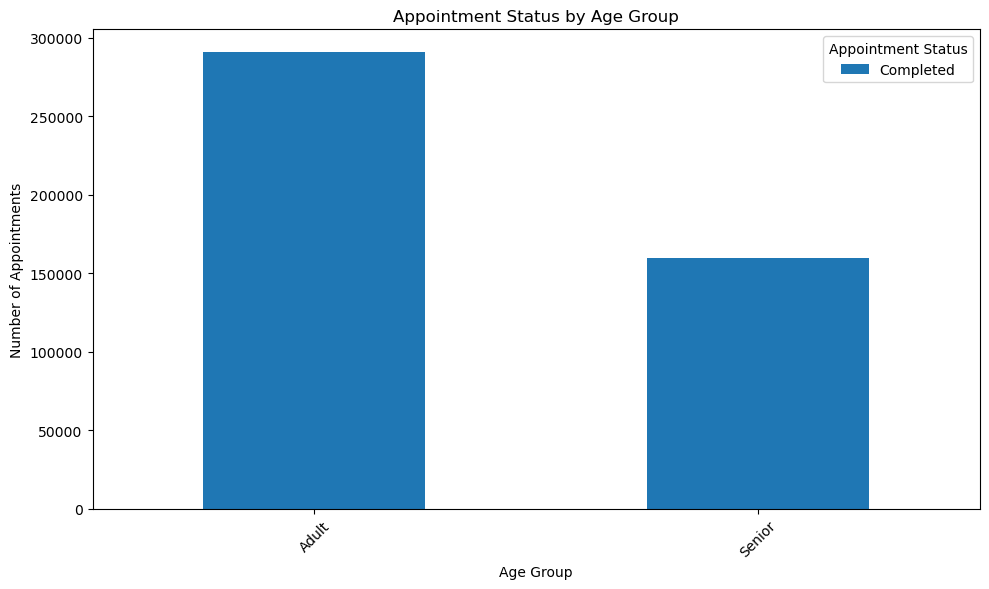


Gender vs Appointment Status Chi-Square Statistic: 0.0, p-value: 1.0


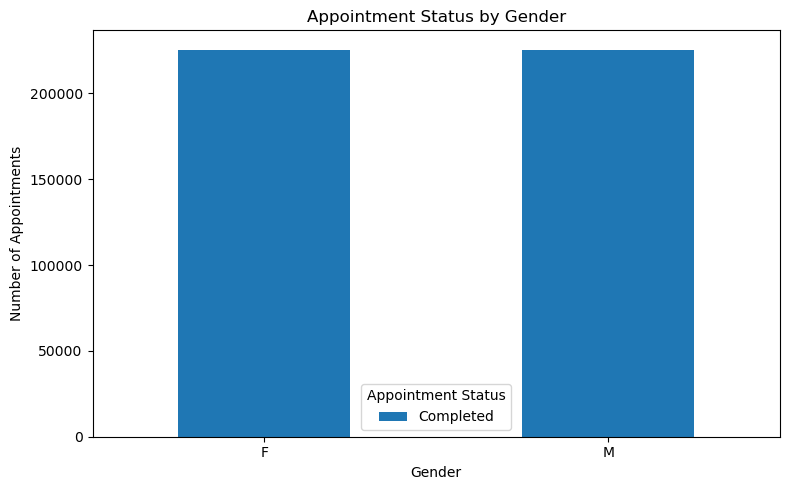

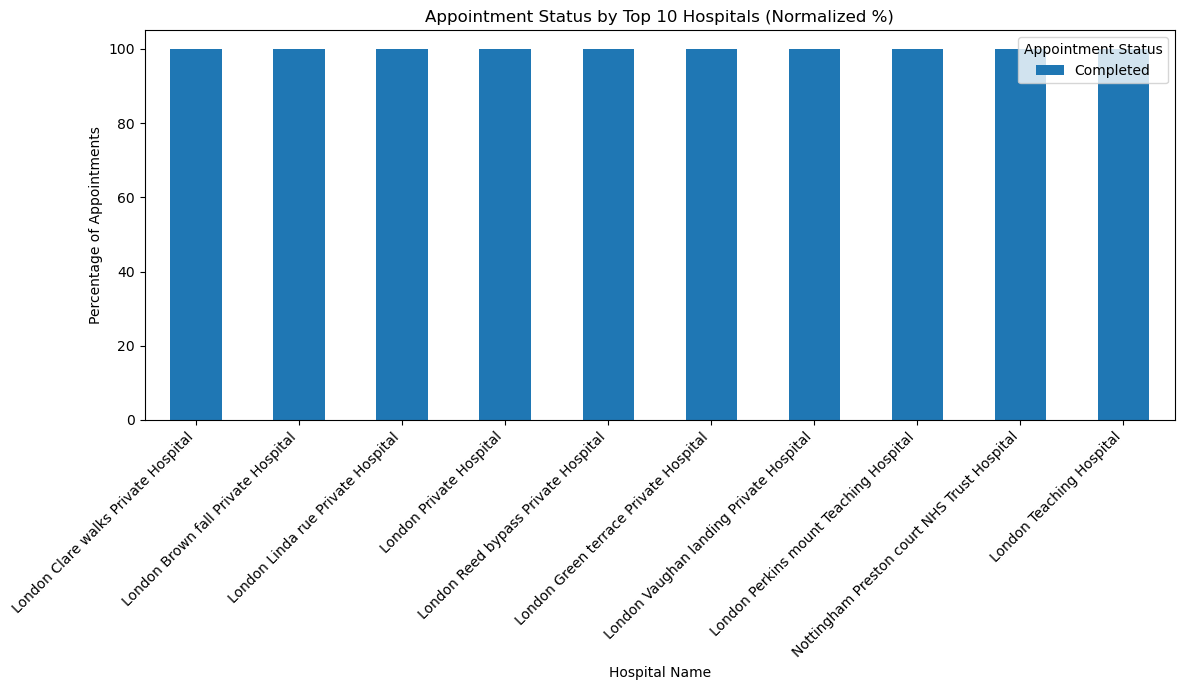

In [1]:
import sqlite3
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('NHSDBB.DB')

# Query to extract relevant data
query = """
SELECT
    a.Appointment_Status,
    p.Patient_Gender,
    CASE
        WHEN strftime('%Y', 'now') - strftime('%Y', p.Patient_Date_Of_Birth) < 18 THEN 'Child'
        WHEN strftime('%Y', 'now') - strftime('%Y', p.Patient_Date_Of_Birth) BETWEEN 18 AND 65 THEN 'Adult'
        ELSE 'Senior'
    END AS Age_Group,
    h.Hospital_Name
FROM Appointment a
JOIN Patient p ON a.Patient_ID = p.Patient_ID
JOIN Hospital h ON a.Hospital_ID = h.Hospital_ID
WHERE a.Appointment_Status IN ('No-Show', 'Completed');
"""


data = pd.read_sql_query(query, conn)

# Create a contingency table
contingency_table = pd.crosstab(data['Age_Group'], data['Appointment_Status'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# Visualize the contingency table
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Appointment Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status')
plt.tight_layout()
plt.show()

# You can also visualize other relationships, for example, Gender vs. Appointment_Status
contingency_table_gender = pd.crosstab(data['Patient_Gender'], data['Appointment_Status'])
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_table_gender)
print(f"\nGender vs Appointment Status Chi-Square Statistic: {chi2_gender}, p-value: {p_gender}")

contingency_table_gender.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Appointment Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=0)
plt.legend(title='Appointment Status')
plt.tight_layout()
plt.show()

# And Hospital_Name vs. Appointment_Status
contingency_table_hospital = pd.crosstab(data['Hospital_Name'], data['Appointment_Status'])
# Perform chi-square test if there are enough samples per hospital, otherwise just visualize
# For brevity, chi-square test is omitted here but can be added if needed.

# Limit the number of hospitals to the top 10 by total appointments
top_hospitals = contingency_table_hospital.sum(axis=1).nlargest(10).index
filtered_hospital_table = contingency_table_hospital.loc[top_hospitals]

# Normalize the filtered contingency table for better comparison
filtered_hospital_table_normalized = filtered_hospital_table.apply(lambda x: x * 100 / sum(x), axis=1)

# Plot the filtered normalized data
filtered_hospital_table_normalized.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Appointment Status by Top 10 Hospitals (Normalized %)')
plt.xlabel('Hospital Name')
plt.ylabel('Percentage of Appointments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Appointment Status')
plt.tight_layout()
plt.show()

conn.close()

### Results
The chi-square test identifies significant association between the variables. The bar plot distribution of appointment statuses across different age groups, genders, and hospitals

### Limitations
Assumes independence between variables; does not account for confounding factors.

## Supervised Learning

### Problem
Predict the likelihood of an appointment being a no show by using patient historical data.
### Solution
using the feature such as the patient demographics, appointment history and hospital information to train a logisitc regression model.
### Justification
Logistic regression is suitable for binary classification such as orediction no shows.
### Implementation


In [2]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Connect to the database
conn = sqlite3.connect('NHSDBB.DB')

# Query to extract relevant data
query = """
SELECT
    a.Appointment_Status,
    p.Patient_Gender,
    CASE
        WHEN strftime('%Y', 'now') - strftime('%Y', p.Patient_Date_Of_Birth) < 18 THEN 'Child'
        WHEN strftime('%Y', 'now') - strftime('%Y', p.Patient_Date_Of_Birth) BETWEEN 18 AND 65 THEN 'Adult'
        ELSE 'Senior'
    END AS Age_Group,
    h.Hospital_Name,
    d.Department_Name
FROM Appointment a
JOIN Patient p ON a.Patient_ID = p.Patient_ID
JOIN Hospital h ON a.Hospital_ID = h.Hospital_ID
JOIN Department d ON a.Department_ID = d.Department_ID;
"""

data = pd.read_sql_query(query, conn)

# Display counts of distinct values for potential features
print("Counts of distinct values for potential features:")
print(data[['Patient_Gender', 'Hospital_Name', 'Department_Name']].nunique())

# Map status to binary values
data['Appointment_Status'] = data['Appointment_Status'].map({'No-Show': 1, 'Completed': 0})

# Check if mapping was successful
if len(data['Appointment_Status'].unique()) < 2:
    raise ValueError("The dataset contains only one class. Ensure the data includes both 'No-Show' and 'Completed' statuses.")

# Drop rows where 'Appointment_Status' is NaN
data.dropna(subset=['Appointment_Status'], inplace=True)

# Encode categorical features
categorical_features = ['Patient_Gender', 'Age_Group', 'Hospital_Name', 'Department_Name']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

# Prepare data for modeling
X = data.drop('Appointment_Status', axis=1)
y = data['Appointment_Status']

# Check the distribution of the target variable
print(y.value_counts())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

conn.close()

Counts of distinct values for potential features:
Patient_Gender       2
Hospital_Name      252
Department_Name     23
dtype: int64
Appointment_Status
0.0    450595
Name: count, dtype: int64


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

### Results
The Linear regression model achieved a mean square of 0 and a R^2 of 1

### Limitations
Overfitting: The model fits the training data too perfectly, capturing noise and specific patterns that is not generalizable to new data. This can lead to poor performance

### Problem
 Segment patients into groups based on healthcare usage patterns to personalize services.

### Solution:
 Use k-means clustering on features like appointment frequency, preferred hospital, and age.

### Justification:
  K-means is effective for identifying patterns in unlabeled data, enabling patient segmentation.

Implementation:

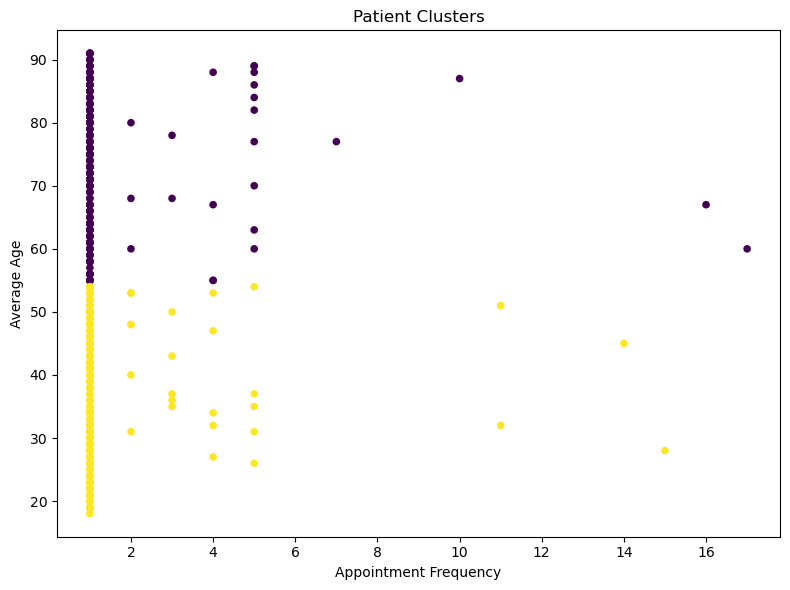

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sqlite3

# Connect to the database
conn = sqlite3.connect('NHSDBB.DB')

query = """
SELECT
    p.Patient_ID,
    COUNT(a.Appointment_ID) AS Appointment_Frequency,
    AVG(strftime('%Y', 'now') - strftime('%Y', p.Patient_Date_Of_Birth)) AS Avg_Age
FROM Appointment a
JOIN Patient p ON a.Patient_ID = p.Patient_ID
GROUP BY p.Patient_ID;
"""
data = pd.read_sql_query(query, conn)

# Normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Appointment_Frequency', 'Avg_Age']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Reduce the number of data points for visualization
data_sample = data.sample(min(500, len(data)), random_state=42)  # Sample up to 500 points

# Visualize clusters with adjusted figure size and marker size
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.scatter(data_sample['Appointment_Frequency'], data_sample['Avg_Age'],
            c=data_sample['Cluster'], cmap='viridis', s=20)  # Adjust marker size
plt.xlabel('Appointment Frequency')
plt.ylabel('Average Age')
plt.title('Patient Clusters')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

conn.close()

### Results
The k-means clustering identified two distinct patient groups based on appointment frequency and average age. The scatter plot visualizes these clusters, aiding in understanding patient healthcare usage patterns

### Limitations
he choice of k=2 may oversimplify the data but if the data is large, it may be difficult to identify the optimal number of clusters. The model may not capture all relevant features, leading to less effective segmentation.

## Task 4: Ethics and Analysis (10 Marks)

**I.** (**5 marks**) Discuss the ethical implications of your modelling solutions given in Task 3. How can these ethical challenges be mitigated in a real-world NHS setting?
    Your answer to this question must not exceed **200 words**.

**Write your answer here (text cell(s) to be used, as appropriate)**

 Ethical implication of the modeling solution includes the potential for bias in the data, which can lead to unfair treatment of certain patient groups. For example, if the training data is not representative of the entire patient population, the model may not perform well for underrepresented groups, leading to disparities in healthcare access and outcomes. Additionally, there are concerns about patient privacy and data security when handling sensitive health information.

 Mitigation strategies requires careful auditing to identify the correct biases to ensur the transparency in the design of the model and decision making pricesses. Impletmentiing robust data governance policies, including anonymization and encryption of patient data, can help protect patient privacy. Regularly updating the model with new data and feedback from healthcare professionals can also help ensure that the model remains relevant and effective in addressing the needs of all patients.



**II.** (**5 marks**) Write a Python script **using SQL** to analyse the database from Task 2 and generate results showing: *(a)* The distribution of hospitals across cities. *(b)* For each hospital, its name, city, the number of departments, and the number of patients who prefer that hospital, using outer join. Sort the hospitals within each city by the number of preferred patients in descending order.

**Write your answer here (text cell(s) to be used, as appropriate)**

In [4]:
### Write your answer here (code cell(s) to be used, as appropriate)
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('NHSDBB.db')

query_a= """
SELECT
    Hospital_Location As City,
    COUNT(*) AS Number_of_Hospitals
FROM Hospital
GROUP BY Hospital_Location
ORDER BY Number_of_Hospitals DESC;
"""

print('Distrubution of hospitals across cities:\n')
df_a = pd.read_sql_query(query_a, conn)
print(df_a.to_string(index=False))

# Hospital info + preferred patient count + department count
query_b = """
SELECT
    h.Hospital_Name,
    h.Hospital_Location AS City,
    Count(DISTINCT d.Department_ID) AS Department_Count,
    Count(DISTINCT p.Patient_ID) AS Preferred_Patient_Count
FROM Hospital h
LEFT JOIN Department d ON h.Hospital_ID = d.Hospital_ID
LEFT JOIN Patient p ON h.Hospital_ID = p.Patient_Preferred_Hospital_ID
GROUP BY h.Hospital_ID
ORDER BY h.Hospital_Location, Preferred_Patient_Count DESC;
"""

print(" Hospital Summary by City and Preference (Sorted):\n")
df_b = pd.read_sql_query(query_b, conn)
print(df_b.to_string(index=False))

# Close the connection
conn.close()

Distrubution of hospitals across cities:

                                   City  Number_of_Hospitals
            997 Diana point, London, UK                    1
      993 Preston court, Nottingham, UK                    1
         990 Kerry ranch, Sheffield, UK                    1
          989 Palmer spring, London, UK                    1
        98 Georgina branch, Belfast, UK                    1
                972 Kate hill, York, UK                    1
            97 Walker plain, London, UK                    1
          97 Teresa neck, Newcastle, UK                    1
         97 Patricia groves, London, UK                    1
         96 Jeffrey corners, London, UK                    1
              96 Jacob keys, Oxford, UK                    1
            95 Bradley fall, London, UK                    1
               94 Liam run, Reading, UK                    1
         939 Matthews forks, London, UK                    1
      938 Arthur islands, Wokingham, UK    

## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on VLE Ultra:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) containing solutions for all the tasks. A template has been provided on VLE;
3. any figures or diagrams that are included in your answers in the Jupyter notebook.


For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.